### Results analyses
##### SRM package

In [1]:
import numpy as np
import pandas as pd
from StatsModel.cov_corr_funcs import *

import matplotlib.pyplot as plt
import sys

# Add custom path
sys.path.insert(0, '/Users/DuoL/Documents/PythonPath')

# Option A: Use style file
plt.style.use('/Users/DuoL/Documents/PythonPath/custom_plot_style.mplstyle')


In [23]:
# df must contain columns: 'SHmax_deg' (0–180°), 's2ratio', 'xnuc'

# cov_aug = covariance_with_cos_rake(ssTable1, rake_col="rake",extra_cols=["Ts0","Td0","PSR","ASl"])

# cov_lin = covariance_naive_linear(ssTable1, "rake", "rake", "ASl")

# strength = circular_strength_axial(ssTable1["SHmax"])

# summary = summarize_interdependency(ssTable1, "SHmax", "rake", "ASl")

# display(cov_aug)     # circular-aware covariance (recommended)
# display(cov_lin)     # naïve reference
# print(strength)      # {'R_double_angle': ..., 'circular_variance_axial': ...}
# display(summary)     # quick association summary


In [ ]:
# modelname='jp3w'

# modelname='jp3xSF2'
# modelname='jp3zBcEL'
# modelname='c9-s40r45F'
# modelname= 'c9s50n27A'
# modelname='welF400tap'

# modelname='jp4bD' # wai+slab
modelname='jp3yF' # wai only
# modelname='jp6a'
# modelname = 'jp3zBc'
add_xyz=True


ssTable1 = pd.read_csv('/Users/DuoL/Documents/NSHM/Central/extraData/slab3v/stress_'+modelname+'_final.csv')
ssTable0 = pd.read_csv('/Users/DuoL/Documents/NSHM/Central/extraData/slab3v/stress_'+modelname+'_t0.csv')

# print(ssTable1['PSR'].max())

ssTable1['sdrop'] = np.sqrt(ssTable0['Td0']**2+ ssTable0['Ts0']**2) - np.sqrt(ssTable1['Td0']**2+ ssTable1['Ts0']**2) 

ssTable1['T0']= np.sqrt(ssTable0['Td0']**2+ ssTable0['Ts0']**2) 
ssTable1['Pf'] = np.abs(ssTable0['Pn0'])

ssTable1['r'] = ssTable1['T0']/ssTable1['Pf']

ssTable1['Sdir'] = np.arcsin(ssTable0['Td0']/ssTable1['T0'])/np.pi*180 # in degree

xdmf_folder = '/Volumes/heiterwange/NSHM/Hikurangi/crustal/'

if add_xyz:
    importlib.reload(StatsModel.cov_corr_funcs)
    from StatsModel.cov_corr_funcs import add_coordinates_from_xdmf

    ssTable1 =add_coordinates_from_xdmf(ssTable1,xdmf_folder + modelname +'-fault.xdmf')

print(ssTable1.keys())

# filter data according to final slip
ssTable2 = ssTable1[ssTable1['ASl'].between(0.5,100,inclusive='both')]

# Filter Vr to maximum 8000 m/s
ssTable2 = ssTable2[ssTable2['Vr'] <= 10000]

print(ssTable1.__len__(),ssTable2.__len__(),ssTable2.keys())



ADDING COORDINATES FROM XDMF

Loading XDMF file: /Volumes/heiterwange/NSHM/Hikurangi/crustal/jp3yF-fault.xdmf
  Reading geometry (vertices)...
  Reading connectivity (elements)...

XDMF data:
  Vertices: 304263
  Elements: 101421
  Vertices per element: 3

Computing element positions using method='centroid'...
  Processed 50000/101421 elements...
  Processed 100000/101421 elements...

Coordinate ranges:
  x: [1690230.92, 1891209.46]
  y: [5328379.67, 5506686.67]
  z: [-29941.59, -56.18]

✓ Added coordinates to DataFrame
  New columns: ['x', 'y', 'z']

Index(['TimeStep', 'fault-tag', 'SRs', 'SRd', 'Ts0', 'Td0', 'Pn0', 'Sls',
       'Sld', 'Vr', 'ASl', 'RT', 'rake', 'Area', 'Cell Type', 'sdrop', 'T0',
       'Pf', 'r', 'Sdir', 'x', 'y', 'z'],
      dtype='object')
101421 24602 Index(['TimeStep', 'fault-tag', 'SRs', 'SRd', 'Ts0', 'Td0', 'Pn0', 'Sls',
       'Sld', 'Vr', 'ASl', 'RT', 'rake', 'Area', 'Cell Type', 'sdrop', 'T0',
       'Pf', 'r', 'Sdir', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
# check Fault output data
# print(ssTable1.keys())

# # filter data according to final slip
# ssTable2 = ssTable1[ssTable1['ASl'].between(0.5,100,inclusive='both')]

# # Filter Vr to maximum 8000 m/s
# ssTable2 = ssTable2[ssTable2['Vr'] <= 10000]

# print(ssTable1.__len__(),ssTable2.__len__(),ssTable2.keys())

In [410]:
# select the target table
# crustal models
# ssTable_all = pd.read_csv('statsTable/stats-crust-mean.csv')

# tag_list = ssTable_all['fault-tag'].to_list()
# model_list = [itag.split('_')[0] for itag in tag_list]

# model_list_crt = np.unique(model_list)

# # slab models
# ssTable_all = pd.read_csv('statsTable/stats-slab2m0-mean.csv')

# tag_list = ssTable_all['fault-tag'].to_list()
# model_list = [itag.split('_')[0] for itag in tag_list]

# model_list_hik = np.unique(model_list)

# print(model_list_crt,model_list_hik)

# 2rd dataset of selected 

df_mw_crt=pd.read_csv('statsTable/df_mw_crt.csv')
df_mw_hik=pd.read_csv('statsTable/df_mw_hik.csv')

model_list_crt = df_mw_crt['model'].to_list()
model_list_hik = df_mw_hik['model'].to_list()

print(model_list_crt,model_list_hik)

# print(df_mw_hik)

# separate crustal and slab segment data

# from StatsModel.prepare_fault_data import prepare_fault_hik_crust_data
# slipm0_hik, slipm0_crt,df_slipm0_hik,df_slipm0_crt = prepare_fault_hik_crust_data(model_list_crt,model_list_hik)


['c9-s40r45E', 'c9-s40r45F', 'c9-s40r45G', 'c9-s40r45H', 'c9s15n27A', 'c9s20n27A', 'c9s35n27b', 'c9s40n26A', 'c9s40n26B', 'c9s40n27A', 'c9s40n27B', 'c9s50n27A', 'jp3yB', 'jp3yD', 'jp3yF'] ['jp3xSF2', 'jp3xSF6', 'jp3yC', 'jp3yE', 'jp3z', 'jp3zB', 'jp3zC', 'jp3zD', 'jp3zE', 'jp3zF', 'jp3zG', 'jp4bC', 'jp4bD', 'jp4bF', 'jp4bFsurf', 'jp4bG', 'jp4bH', 'jp4bH_att', 'jp4d', 'jp4e', 'jp4eAtt', 'jp4f', 'jp4g']


In [ ]:
#!!!  Prepare fault moment table for all models.

import StatsModel.prepare_fault_data
importlib.reload(StatsModel.prepare_fault_data)
from StatsModel.prepare_fault_data import prepare_fault_moment_data

model ='crustal' # input file location
outdir = 'crustalM0'
xdmffolder = '/Volumes/heiterwange/NSHM/Hikurangi/crustal'


# either it slab events or crustal events
prepare_fault_moment_data(model=model,model_list=model_list,variable_list=variable_list,outdir=outdir, xdmffilefolder=xdmffolder)




In [269]:
print(ssTable1['ASl'].median(),ssTable1['ASl'].mean(),ssTable1['ASl'].max(),ssTable1['ASl'].min())
print()

0.51389 3.565061963695494 16.729 -0.18365


In [ ]:
# combine slab and crustal together
# Initialize lists for collecting data


In [290]:
# print(df_slipm0_crt.keys())
# print(df_slipm0_hik.keys())

Index(['model', 'fault-tag', 'mean_slip', 'Mw', 'total_M0', 'count'], dtype='object')
Index(['model', 'fault-tag', 'mean_slip', 'Mw', 'total_M0', 'count'], dtype='object')


In [ ]:
# precess timing and duration, total moment and slip data form fault output

importlib.reload(StatsModel.prepare_fault_data)
from StatsModel.prepare_fault_data import process_models_timing

# Process all Hikurangi models
model_list_hik_example = ['jp3z', 'jp3xSF2', 'jp3y']

df_all_timing_hik = process_models_timing(
    model_list_hik,
    data_folder='/Users/DuoL/Documents/NSHM/Central/cov/slab3v/',
    material_file='/Users/DuoL/Documents/NSHM/Central/cov/resample_mat.csv',
    xdmf_folder='/Volumes/heiterwange/NSHM/Hikurangi/FaultOutput/',
    add_xyz=True,
)

print(df_all_timing_hik.__len__())

df_all_timing_hik.to_csv('onset_dur_m0_hik.csv')

# Visualize
# fig, axes = plot_segment_timing(df_all_timing, save_path='timing_analysis.png')
# plt.show()

In [3]:
# importlib.reload(StatsModel.prepare_fault_data)
# from StatsModel.prepare_fault_data import plot_variable_histogram

df_all_timing_hik = pd.read_csv('statsTable/onset_dur_m0_hik.csv')
df_all_timing_crt = pd.read_csv('statsTable/onset_dur_m0_crt.csv')

print(df_all_timing_hik.keys(),df_all_timing_crt.keys())

# print(df_all_timing_hik[df_all_timing_hik['Mw'].between(0,5.6)])


# Plot duration histogram
# fig, ax = plot_variable_histogram(
#     df_all_timing_crt,
#     variable='total_area',
#     bins=30,
#     save_path='area-crt-histogram.png',
# )

# plt.show()


Index(['Unnamed: 0', 'model', 'fault-tag', 'count', 'RT_start', 'RT_end',
       'duration', 'Mw', 'mean_slip', 'total_M0', 'total_area'],
      dtype='object') Index(['Unnamed: 0', 'model', 'fault-tag', 'count', 'RT_start', 'RT_end',
       'duration', 'Mw', 'mean_slip', 'total_M0', 'total_area'],
      dtype='object')


In [15]:
# load usgs catalog for recent earthquakes

file1 = '/Users/DuoL/Documents/SeisSol/Kaikoura/usgs_earthquakes_with_duration.csv'
file2 = '/Users/DuoL/Documents/SeisSol/Kaikoura/detailed_events/detailed_event_info.csv'

df_usgs_events= pd.read_csv(file1)
df_usgs_all = pd.read_csv(file2)

print(df_usgs_events.keys(), df_usgs_all.keys())

print(df_usgs_events['seismic_moment_Nm'],df_usgs_events['year'])


Index(['event_id', 'time', 'latitude', 'longitude', 'depth_km', 'magnitude',
       'magnitude_type', 'seismic_moment_Nm', 'place', 'event_type', 'status',
       'tsunami', 'significance', 'felt_reports', 'cdi', 'mmi', 'alert',
       'network', 'code', 'ids', 'sources', 'types', 'nst', 'dmin', 'gap',
       'rms', 'url', 'detail_url', 'log10_M0', 'year', 'month',
       'magnitude_detailed', 'has_finite_fault', 'rupture_duration_s',
       'rupture_velocity_km_s', 'model_dip', 'model_length_km', 'model_strike',
       'model_top_km', 'model_width_km', 'maximum_slip_m'],
      dtype='object') Index(['event_id', 'magnitude', 'has_finite_fault', 'rupture_duration_s',
       'rupture_velocity_km_s', 'model_dip', 'model_length_km', 'model_strike',
       'model_top_km', 'model_width_km', 'maximum_slip_m'],
      dtype='object')
0      1.000000e+19
1      1.995262e+19
2      7.079458e+18
3      7.079458e+18
4      3.162278e+20
           ...     
507    7.079458e+18
508    2.818383e+19
509

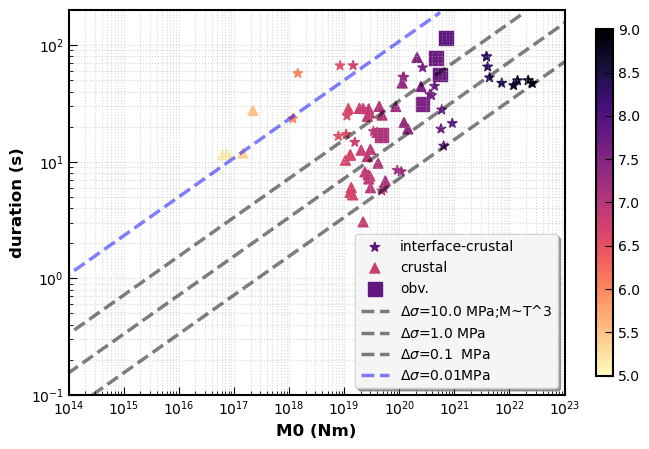

In [16]:
# print(df_all_timing.head())

add_obv = True
add_usgs = False

obv_mod= ['2016 Mw7.8 Kaikoura','2023 M7.8 Turkey','2023 M7.4 Turkey','2025 M7.7 Myanmar','2024 M7.1 South Tibet']
obv_m0 = np.array([7.040e+20, 5.389e+20 ,2.637e+20,4.634e+20 ,4.749e+19])
obv_dur= [58*2, 28*2, 15.75 *2, 38.5*2, 8.5*2]


df_all_timing_hik_fil = df_all_timing_hik[df_all_timing_hik['Mw'].between(5.5,9.0)]

fig,axe=plt.subplots(1,1,figsize=(8,5))

im3 = axe.scatter(df_all_timing_hik_fil['total_M0'],df_all_timing_hik_fil['duration'],marker='*',s=50,c=df_all_timing_hik_fil['Mw'],cmap='magma_r',
                  vmax=9,vmin=5.0,label='interface-crustal')
axe.scatter(df_all_timing_crt['total_M0'],df_all_timing_crt['duration'],marker='^',s=50,
            c=df_all_timing_crt['Mw'],vmax=9,vmin=5.0,cmap='magma_r',label='crustal')

if add_obv:
    # obv. list
    axe.scatter(obv_m0,obv_dur,marker='s',s=100,c= 2.0/3.0*np.log10(obv_m0)-6.07,cmap='magma_r',label='obv.',vmax=9,vmin=5.0,)


if add_usgs:

    axe.scatter(df_usgs_events['seismic_moment_Nm'],df_usgs_events['rupture_duration_s'],marker='s',s=100, c=2.0/3.0* df_usgs_events['log10_M0']-6.07,cmap='magma_r',
               label='USGS',vmax=9,vmin = 5. )

tarr = np.arange(0.1,200,10)

mu=40e9

v0=3000.0

sdrop= 10e6

m0arr = tarr**3 * v0**3 *sdrop
axe.plot(m0arr,tarr, '--',c='k',alpha=0.5,label=f'$\Delta\sigma$={sdrop/1e6} MPa;M~T^3')

sdrop= 1e6
m0arr = tarr**3 * v0**3*sdrop
axe.plot(m0arr,tarr, '--',c='k',alpha=0.5,label=f'$\Delta\sigma$={sdrop/1e6} MPa')

sdrop= 0.1e6
m0arr = tarr**3 * v0**3*sdrop
axe.plot(m0arr,tarr, '--',c='k',alpha=0.5,label=f'$\Delta\sigma$={sdrop/1e6}  MPa')

v0=2000.0

sdrop= 0.01e6
m0arr = tarr**3 * v0**3*sdrop
axe.plot(m0arr,tarr, '--',c='b',alpha=0.5,label=f'$\Delta\sigma$={sdrop/1e6}MPa')


clb=plt.colorbar(im3,ax=axe,shrink=0.9)

axe.set_xscale('log')
axe.set_yscale('log')
axe.set_ylim([0.1,200])
axe.set_xlim([1e14,1e23])
axe.set_xlabel('M0 (Nm)')
axe.set_ylabel('duration (s)')
plt.legend()

plt.show()


PLOTTING HISTOGRAM: mean_slip

Plotting 32 values
Range: [0.589, 41.1]
Mean: 8.36
Median: 6.11

Grouping by 'fault-tag': 4 groups
  Aotea: n=9, mean=6.28, median=5.28
  Wellington: n=7, mean=4.3, median=2.53
  Whitemans: n=7, mean=3.07, median=1.96
  Hikurangi: n=9, mean=17.7, median=11.3

✓ Saved figure to: slip_by_segment.png

✓ Histogram plot created successfully


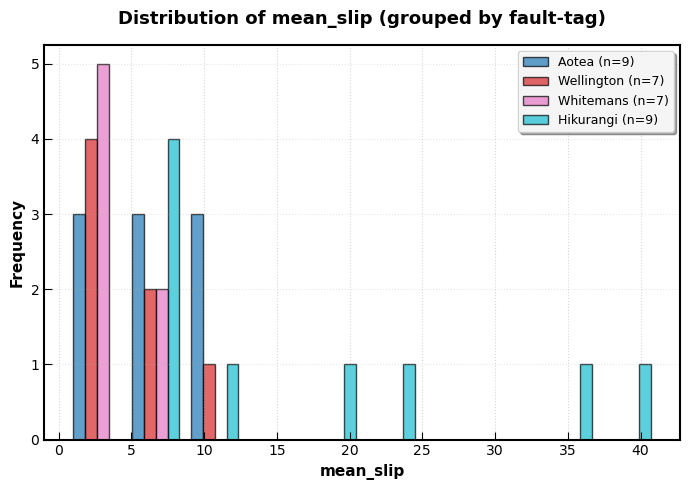

In [569]:
# Plot histogram

# df_all = pd.concat([df_all_timing_crt])

# fig,axe1 = plot_histogram_circular(df_all,col='duration')

# plt.savefig('dist-all-T.png',dpi=300)

# fig,axe1 = plot_histogram_circular(ssTable2,col='rake',color='violet',bins=36,figsize=(5,5),title='')

# plt.show()

importlib.reload(StatsModel.prepare_fault_data)
from StatsModel.prepare_fault_data import plot_variable_histogram

fault_labels = {
    68: 'Hikurangi',
    3: 'Aotea',
    65: 'Wellington',
    66: 'Whitemans',
}

# Plot mean_slip histogram, grouped by fault segment
fig, ax = plot_variable_histogram(
    df_all_timing_hik_fil,
    variable='mean_slip',
    group_by='fault-tag',
    group_labels=fault_labels,
    bins=10,
    save_path='slip_by_segment.png'
)
plt.show()


# fig,axe1 = plot_histogram_circular(ssTable2,col='Sdir',color='royalblue',bins=36,figsize=(5,5),title='')

# plt.show()

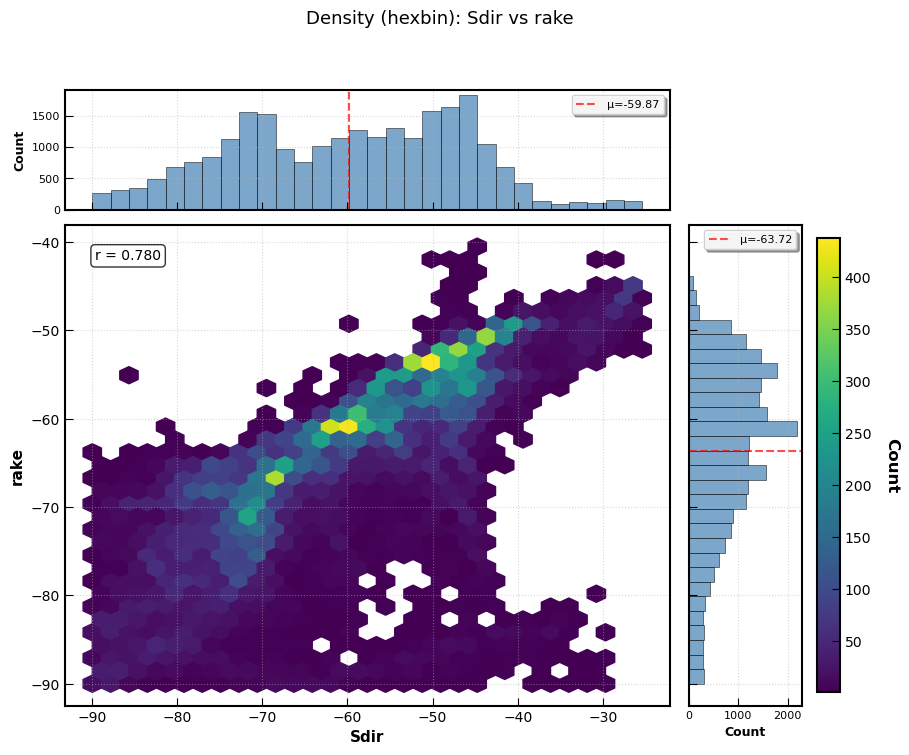

In [710]:
# plot corrrelation matrix

fig,axe1 = plot_density_hexbin(ssTable2,x_col='Sdir',y_col='rake')

plt.savefig('Sdir-rake-'+modelname+'.png')




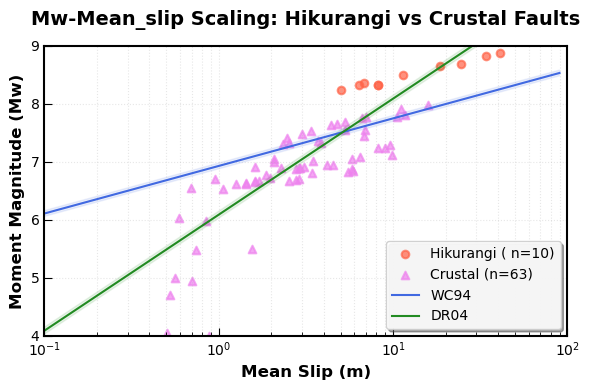

In [300]:
# plot all data togeter

import StatsModel.plot_bias_sigma
importlib.reload(StatsModel.plot_model_scale)
from StatsModel.plot_model_scale import plot_model_scaling

fig,axe = plot_model_scaling(df_slipm0_hik,df_slipm0_crt)

plt.show()

### Moment rate plot

[skip] Failed to read ._c9-s40r45F-energy.csv: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte
[skip] Failed to read ._c9-s40r45G-energy.csv: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte
[skip] Failed to read ._c9s15n27A-energy.csv: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte
[skip] Failed to read ._c9s20n27A-energy.csv: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte
[skip] Failed to read ._c9s35n27b-energy.csv: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte
[skip] Failed to read ._c9s40n26A-energy.csv: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte
[skip] Failed to read ._jp3yD-energy.csv: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte
[skip] Failed to read ._jp3yF-energy.csv: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte
c9-s40r45E: Mw 7.36
c9-s40r45F: Mw 7.10
c9-s40r45G: Mw 7.05
c9

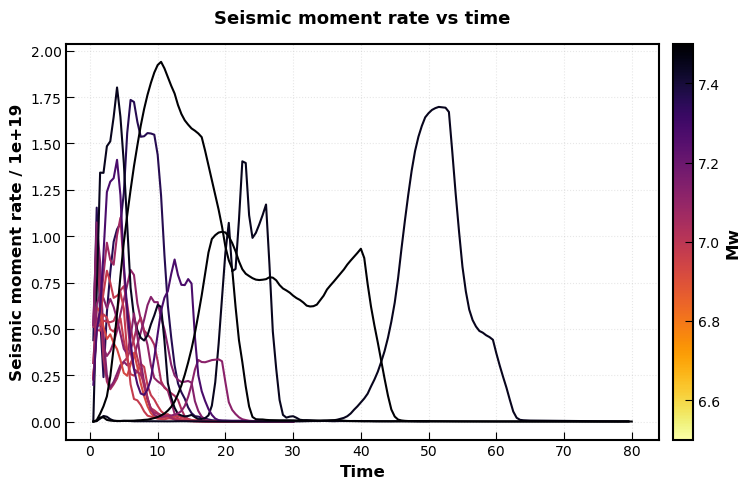

In [395]:
importlib.reload(StatsModel.prepare_fault_data)
from StatsModel.prepare_fault_data import plot_all_moment_rates_colored

# Example: all CSVs like /path/to/Joint4/energy/<model>-energy.csv
df_mw_crt,fig, axe = plot_all_moment_rates_colored("/Volumes/heiterwange/NSHM/Hikurangi/STFs/crustal/",
                               pattern="*-energy.csv",
                               scale_rate=1e19,
                               cmap_name='inferno_r',
                               savepath="STF_crt_all.png",
                               mw_range=[6.5,7.5],
                               show=True)





In [396]:
df_mw_hik.to_csv('df_mw_hik.csv')
df_mw_crt.to_csv('df_mw_crt.csv')

## Load data and ploe the scaling for different model setups: crustal, Joint3 and Joint4

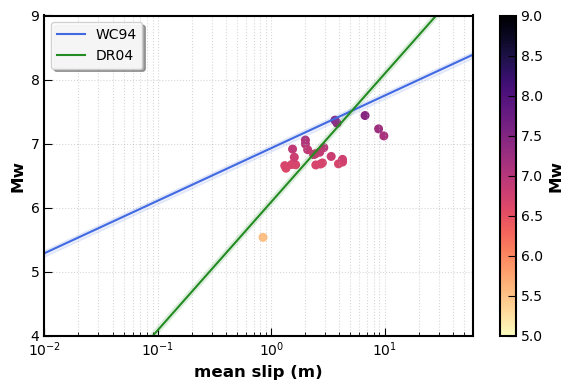

In [275]:
# print(df_moment.keys())


fig,axe = plt.subplots(1,1,figsize=(6,4))

for imod, modelname in enumerate(model_list):

    try:
        df_moment=pd.read_csv('statsTable/'+ outdir +'/statsM0-'+modelname+'.csv')

        im3 = axe.scatter((df_moment['mean_slip']),df_moment['Mw'],c=df_moment['Mw'],s=30,cmap='magma_r',vmax=9,vmin=6)
    except:
        pass

u_avg = np.arange(0.01,60,2)

a,a_std,b,b_std = 6.93 ,0.05, 0.82,0.0

axe.plot((u_avg),a + b*np.log10(u_avg),color='royalblue',linestyle='-',linewidth = 1.5,label=f'WC94')
axe.fill_between((u_avg),(a-a_std) + b*np.log10(u_avg),(a+a_std) + b*np.log10(u_avg),alpha=0.1,
                 color='royalblue')

# Mw={a} + {b}*1og(u_mean) 
a,a_std,b,b_std = 6.09,0.06, 2,0.0

axe.plot((u_avg),a + b*np.log10(u_avg),color='forestgreen',linestyle='-',linewidth = 1.5,label=f'DR04')
axe.fill_between((u_avg),(a-a_std) + b*np.log10(u_avg),(a+a_std) + b*np.log10(u_avg),alpha=0.1,
                 color='forestgreen')


# scaling from Stirling (2024) NSHM

# a,a_std,b,b_std = 4.3,0.0,1,0.0

# axe.plot((u_avg),a-a_std+b* np.log10(u_avg),color='tomato',linestyle='-',linewidth = 1.5,label=f'SEA24:strike)')
# axe.plot((u_avg),a+a_std+b* np.log10(u_avg),color='tomato',linestyle='-',linewidth = 1.5)
# axe.fill_between((u_avg),(a-a_std) + b*np.log10(u_avg),(a+a_std) + b*np.log10(u_avg),alpha=0.1,
#                  color='tomato')

# a,a_std,b,b_std = 3.6,0.0,1,0.0

# axe.plot((u_avg),a+a_std +b* np.log10(u_avg),color='tomato',linestyle='-',linewidth = 1.5,label=f'(SEA24:interface)')
# axe.plot((u_avg),a-a_std +b* np.log10(u_avg),color='tomato',linestyle='-',linewidth = 1.5)
# axe.fill_between((u_avg),(a-a_std) + b*np.log10(u_avg),(a+a_std) + b*np.log10(u_avg),alpha=0.1,
#                  color='tomato')


axe.set_xscale('log')
axe.set_xlabel('mean slip (m)')
axe.set_ylabel('Mw')
axe.set_xlim([0.01,60])
axe.set_ylim([4,9])
axe.legend()
clb = plt.colorbar(im3,ax=axe)
clb.set_label('Mw')

plt.tight_layout()

plt.savefig('covfigures/'+'MwSlip-scaling-'+outdir + '.png')

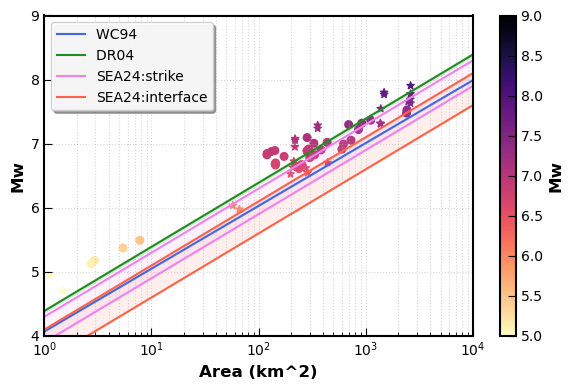

In [494]:
# scaling between Mw and log(A) 

fig,axe = plt.subplots(1,1,figsize=(6,4))

# for imod, modelname in enumerate(model_list):

#     try:
#         df_moment=pd.read_csv('statsTable/'+ outdir + '/'+'statsM0-'+modelname+'.csv')

#         im3 = axe.scatter((df_moment['total_area'])/1e6,df_moment['Mw'],c=df_moment['Mw'],s=30,cmap='magma_r',vmax=9,vmin=5)
#     except:
#         pass

im3 = axe.scatter((df_all_timing_crt['total_area'])/1e6,df_all_timing_crt['Mw'],c=df_all_timing_crt['Mw'],s=30,cmap='magma_r',vmax=9,vmin=5)
axe.scatter((df_all_timing_hik['total_area'])/1e6,df_all_timing_hik['Mw'],marker='*',c=df_all_timing_hik['Mw'],s=50,cmap='magma_r',vmax=9,vmin=5)

u_avg = np.arange(1,10000,100)


# Mw=4.07 + 0.98*1og(A)   Donald L. Wells and Kevin J. Coppersmith
a,a_std,b,b_std = 4.07,0,0.98,0.0
axe.plot((u_avg),4.07 + 0.98*np.log10(u_avg),color='royalblue',linestyle='-',linewidth = 1.5,label='WC94 ')
axe.fill_between((u_avg),(a-a_std) + b*np.log10(u_avg),(a+a_std) + b*np.log10(u_avg),alpha=0.1,
                 color='royalblue')


# Mw=4.39 + 1.0*1og(A)  D. J. Dowrick and D. A. Rhoades
a,a_std,b, b_std = 4.39, 0.03, 1.0 ,0.0
axe.plot((u_avg),a + b*np.log10(u_avg),color='forestgreen',linestyle='-',linewidth = 1.5,label='DR04 ')
axe.fill_between((u_avg),(a-a_std) + b*np.log10(u_avg),(a+a_std) + b*np.log10(u_avg),alpha=0.1,
                 color='forestgreen')


# Stirling et al. 2024.
# strike slip
a,a_std,b,b_std = (4.3+3.9)/2, (4.3-3.9)/2,1,0.0

axe.plot((u_avg),a-a_std+b* np.log10(u_avg),color='violet',linestyle='-',linewidth = 1.5,label=f'SEA24:strike')
axe.plot((u_avg),a+a_std+b* np.log10(u_avg),color='violet',linestyle='-',linewidth = 1.5)
axe.fill_between((u_avg),(a-a_std) + b*np.log10(u_avg),(a+a_std) + b*np.log10(u_avg),alpha=0.1,
                 color='violet')

# slab interface
a,a_std,b,b_std = (4.1+3.6)/2, (4.1-3.6)/2,1,0.0

axe.plot((u_avg),a+a_std +b* np.log10(u_avg),color='tomato',linestyle='-',linewidth = 1.5,label=f'SEA24:interface')
axe.plot((u_avg),a-a_std +b* np.log10(u_avg),color='tomato',linestyle='-',linewidth = 1.5)
axe.fill_between((u_avg),(a-a_std) + b*np.log10(u_avg),(a+a_std) + b*np.log10(u_avg),alpha=0.1,
                 color='tomato')

# axe.plot((u_avg),3.78+1.33* np.log10(100*u_avg),color='tomato',linestyle='--',linewidth = 1.5,label='Mw=3.78+1.33*1og(u_mean) (VET24) ')


axe.set_xscale('log')
axe.set_xlabel('Area (km^2)')
axe.set_ylabel('Mw')
axe.set_xlim([1,10000])
axe.set_ylim([4,9])
axe.legend()
clb = plt.colorbar(im3,ax=axe)
clb.set_label('Mw')

plt.tight_layout()

plt.savefig('covfigures/'+'MwArea-scaling-all-'+outdir+'.png')

/var/folders/7n/hc17svy55_bfzb_y1r6qgry00000gp/T/ipykernel_2936/2681434771.py:18: UserWarning: Adding colorbar to a different Figure <Figure size 1200x300 with 2 Axes> than <Figure size 600x500 with 4 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(im3)


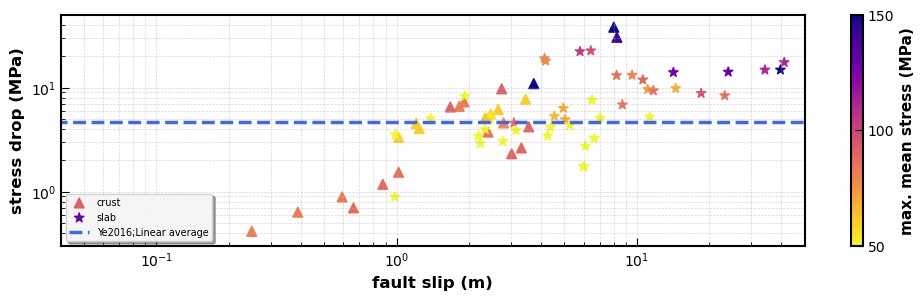

In [670]:
# scalng for moment and stress drop


ssTable_all=pd.read_csv('statsTable/stats-slab3v-mean-sdir.csv')
ssTable_all_crt=pd.read_csv('statsTable/stats-crust-mean-sdir.csv')

add_slab = True

plt.figure(figsize=(12,3))

im3 = plt.scatter(ssTable_all_crt['ASl'],ssTable_all_crt['sdrop']/1e6,s=50,c=ssTable_all_crt['Pf']/1e6,vmax=150,vmin=50,marker='^',cmap='plasma_r',label='crust')

if add_slab:
    im3 = plt.scatter(ssTable_all['ASl'],ssTable_all['sdrop']/1e6,s=50,c=ssTable_all['Pf']/1e6,vmax=150,vmin=50,marker='*',cmap='plasma_r',label='slab')

plt.plot(np.array([0.01,100]),np.array([4.63,4.63]),'--',c='royalblue',label='Ye2016;Linear average')

cbar = fig.colorbar(im3)
cbar.set_label('max. mean stress (MPa)',fontsize=11)
cbar.set_ticks([50,100,150])
plt.legend(loc=3,fontsize=7)

if add_slab:
    print()
    plt.xlim([0.04, 50])
    plt.ylim([0.3,50])

else:
    plt.xlim([0.04, 20])
    plt.ylim([0.3,50])

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='--',which='both',linewidth=0.5)

plt.ylabel('stress drop (MPa)')
plt.xlabel('fault slip (m)')


plt.savefig('StressDrop-slab-scaling.png',dpi=300)
plt.show()

plt.close()

In [ ]:
print(model)

### energy proxy

In [128]:
# seperate eneryg based on fault-tag
import importlib, StatsModel.combine_cov_data
from StatsModel.combine_cov_data import group_by_fault_tag,group_by_fault_tag_multi_stats


variable_list = ['rake','ASl','Vr','PSR','T0','r']

# df_grouped = group_by_fault_tag(
#     ssTable2,
#     variable_list=variable_list,
#     agg_func='mean',
# )

# More comprehensive statistics
df_stats = group_by_fault_tag_multi_stats(
    ssTable2,
    variable_list=variable_list,
    stats=['mean', 'std', 'min', 'max', 'median', 'count']
)



MULTI-STATISTIC GROUPING SUMMARY
Grouped by: fault-tag
Number of groups: 3
Variables: ['rake', 'ASl', 'Vr', 'PSR', 'T0', 'r']
Statistics: ['mean', 'std', 'min', 'max', 'median', 'count']



In [ ]:
ssTable3= ssTable2[ssTable2['fault-tag'].isin([3])]
print(ssTable3['PSR'].min(),ssTable3['PSR'].max())
print(df_stats.keys())

In [ ]:
# plot  magnitude slip scaling for a single model
importlib.reload(StatsModel.cov_corr_funcs)
from StatsModel.cov_corr_funcs import (calculate_seismic_moment_by_fault,
                                       plot_seismic_moment_summary)

# Calculate seismic moment by fault segment
df_moment = calculate_seismic_moment_by_fault(
    fault_data=ssTable2,
    material_file='/Users/DuoL/Documents/NSHM/Central/cov/resample_mat.csv'
)

# Display results
print(df_moment)

# Plot summary
fig, axes = plot_seismic_moment_summary(df_moment,
                                        save_path='covfigures/'+ 'moment_summary.png')

axes[0,0].set_xticklabels(['Hik','Wai','Wel','Aot'])
axes[0,1].set_xticklabels(['Hik','Wai','Wel','Aot'])

plt.savefig('covfigures/'+ 'moment_summary.png',dpi=300)
# plt.show()

# Save results

df_moment.to_csv('statsTable/'+ 'moment_by_fault.csv', index=False)

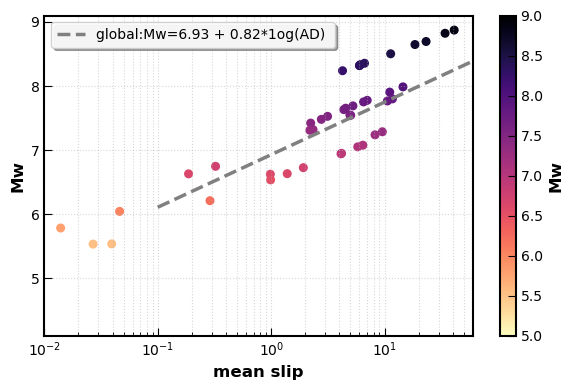

In [ ]:
import importlib, StatsModel.combine_cov_data
importlib.reload(StatsModel.combine_cov_data)
from StatsModel.combine_cov_data import plot_grouped_stats

df_stats.to_csv('statsTable/'+'stats-fault-'+modelname+'.csv')
# print(df_stats.keys())


# With error bars from multi-stats
# df_stats = group_by_fault_tag_multi_stats(ssTable1, ['rake', 'ASl', 'Vr'])
fig, axes = plot_grouped_stats(df_stats, stats_to_plot=['mean'], plot_type='bar',groupby_column='fault-tag',
                                show_errorbar=True,variables=variable_list,pregroup_by_segtag=False)

plt.savefig('covfigures/'+'grouped-'+modelname +'.png')

In [441]:
print(ssTable_all.__len__())

60


### correlation relation

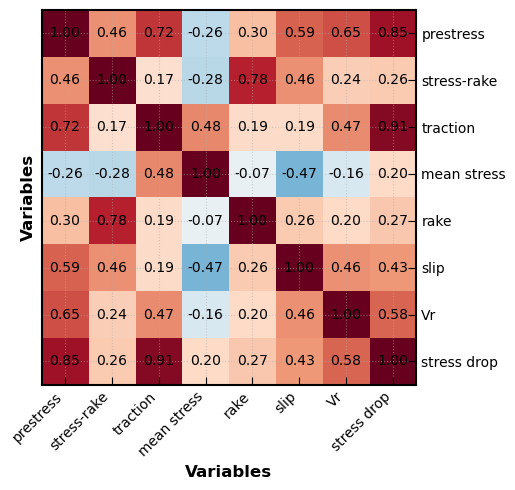

In [711]:
# calcualte the covariance and correlaton matrix from simulation results

import importlib
import StatsModel.cov_corr_funcs
importlib.reload(StatsModel.cov_corr_funcs)
from StatsModel.cov_corr_funcs import plot_corr_heatmap,covariance_with_cos_rake,cov_to_corr

# ssTable_all=pd.read_csv('statsTable/stats-crust-mean-sdir.csv')
# ssTable_all=pd.read_csv('statsTable/stats-slab3v-mean-sdir.csv')

# modelname = 'jp3zBc'

cov_aug = covariance_with_cos_rake(ssTable2, rake_col="r",extra_cols=['Sdir','T0','Pf','rake','ASl','Vr','sdrop'])

df = cov_to_corr(cov_aug)

plot_corr_heatmap(df,labels=['prestress','stress-rake','traction','mean stress','rake','slip','Vr',
                             'stress drop'])

plt.savefig('covfigures/'+'cor-'+modelname+'.png')

In [623]:
print(ssTable_all.__len__(),ssTable_all.head())

Index(['Unnamed: 0.1', 'Unnamed: 0', 'fault-tag', 'count', 'Td0', 'ASl', 'Vr',
       'rake', 'Ts0', 'Pn0', 'Sls', 'Sld', 'RT', 'seg-tag', 'sdrop', 'T0',
       'Pf', 'r', 'Sdir'],
      dtype='object')    Unnamed: 0.1  Unnamed: 0 fault-tag  count           Td0        ASl  \
0             0           0    jp3b_3   6439  4.933226e+06  24.011573   
1             1           1   jp3b_65  23673  2.719121e+06  14.200396   
2             2           2   jp3b_66   6191  1.399590e+06   3.079623   
3             3           3   jp3b_68  44750  1.041751e+07  39.608007   
4             4           4    jp3w_3  26905  1.992845e+05  14.518929   

             Vr       rake           Ts0           Pn0        Sls        Sld  \
0  4.328743e+03  21.058254 -8.896054e+06 -1.090641e+08 -21.127531   8.849470   
1  3.280655e+03  19.739933 -8.801527e+06 -9.952522e+07 -12.422732   4.784803   
2  7.655731e+02  21.170365 -4.432953e+06 -7.473240e+07  -0.819196   0.633733   
3  4.278291e+03  58.547145  6.377447e+

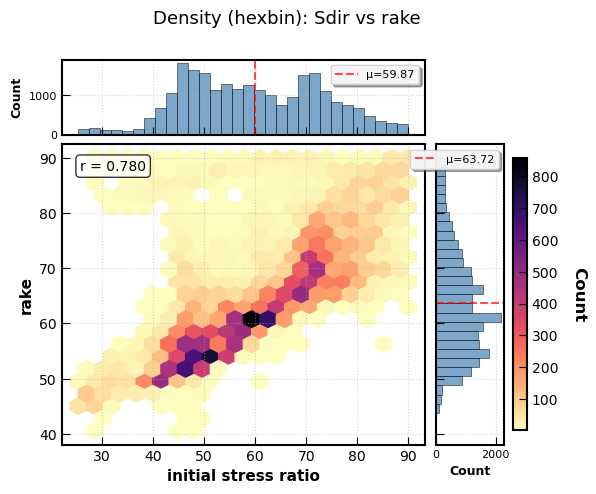

In [675]:
importlib.reload(StatsModel.cov_corr_funcs)
from StatsModel.cov_corr_funcs import plot_density_hexbin,plot_density_2d

# fig, axe = plot_density_2d(ssTable2,x_col='r',y_col='ASl',bins=50,figsize=(6,5),
#                           scatter_size=2,scatter_alpha=0.2)

# ssTable_all = pd.read_csv('statsTable/stats-slab3v-mean-sdir.csv')

ssTable2['rake'] = - ssTable2['rake']
# ssTable2['Sdir'] = - ssTable2['Sdir']

ptitle='prestress~slip' 
ptitle='rake~slip'
ptitle='stress~rake'
# ptitle='prestress~Vr'

if ptitle=='prestress~slip':

    fig, axe = plot_density_hexbin(ssTable2,x_col='r',y_col='ASl',gridsize=30,figsize=(6,5),cmap='magma_r')

    xlabel1='prestress ratio'
    ylabel1='fault slip (m)'

elif ptitle=='stress~rake':

    fig, axe = plot_density_hexbin(ssTable2,x_col='Sdir',y_col='rake',gridsize=20,figsize=(6,5),cmap='magma_r')

    xlabel1='initial stress ratio'
    ylabel1='rake'

elif ptitle=='rake~slip':

    fig, axe = plot_density_hexbin(ssTable2,x_col='rake',y_col='ASl',gridsize=10,figsize=(6,5),cmap='magma_r')

    xlabel1='rake (degree)'
    ylabel1='fault slip (m)'

else:

    fig, axe = plot_density_hexbin(ssTable2,x_col='r',y_col='Vr',gridsize=300,figsize=(6,5),cmap='magma_r')

    xlabel1='prestress ratio'
    ylabel1='rupture velocity (m/s)'   
    axe['main'].set_ylim([0,18000])


axe['main'].set_title(ptitle)

axe['main'].set_ylabel(ylabel1)
axe['main'].set_xlabel(xlabel1)

plt.savefig('covfigures/'+'hist2d-'+ modelname+ '-'+ ptitle + '.png')
plt.show()


In [620]:
print(axe['main'].set_title)

<bound method Axes.set_title of <Axes: xlabel='r', ylabel='ASl'>>


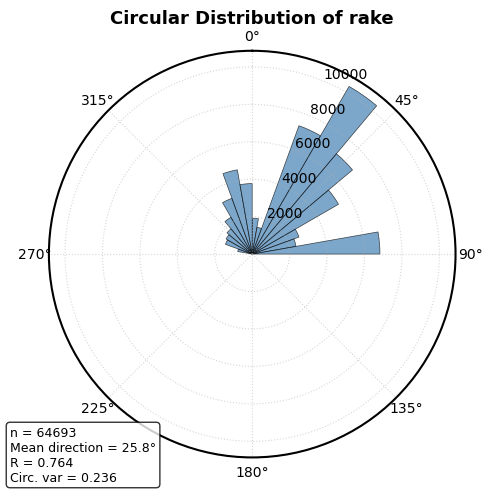

<Figure size 1000x600 with 0 Axes>

In [704]:
# 1D histogram
import StatsModel.cov_corr_funcs

importlib.reload(StatsModel.cov_corr_funcs)
from StatsModel.cov_corr_funcs import plot_histogram_circular

normal_direct=False

if normal_direct:
    ssTable1['rake']=-ssTable1['rake']

fig, axe = plot_histogram_circular(ssTable2,col='rake',figsize=(5,5))

plt.savefig('covfigures/'+'rose-rake-'+ modelname + '.png',dpi=300)
plt.show()

In [705]:
print(ssTable_all.__len__(),ssTable_all.keys())

27 Index(['Unnamed: 0.1', 'Unnamed: 0', 'fault-tag', 'count', 'PSR', 'Td0', 'ASl',
       'Vr', 'rake', 'Ts0', 'Pn0', 'Sls', 'Sld', 'seg-tag', 'sdrop', 'T0',
       'Pf', 'r', 'Sdir'],
      dtype='object')


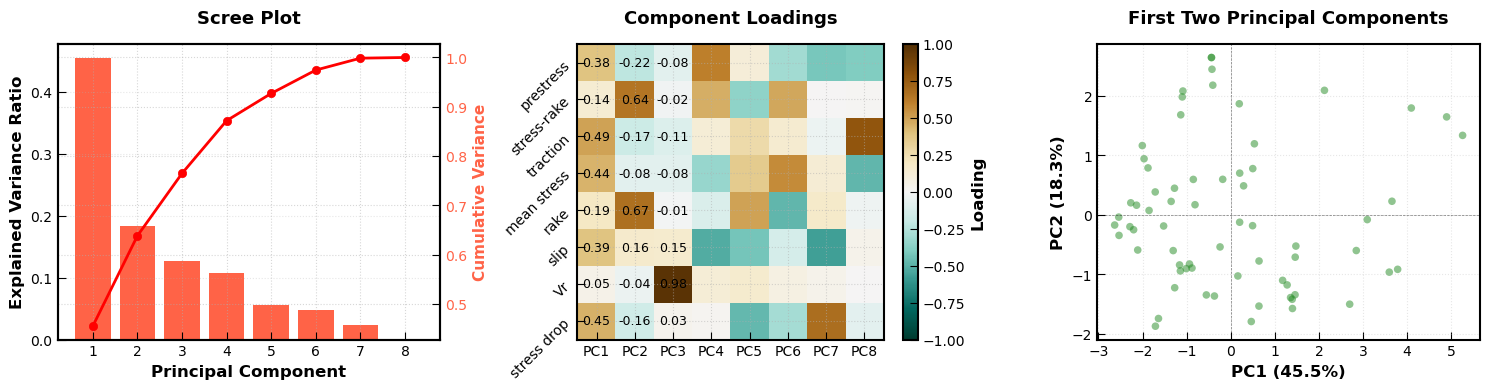

In [ ]:
importlib.reload(StatsModel.cov_corr_funcs)
from StatsModel.cov_corr_funcs import plot_pca_analysis

# Convert to dict with numpy arrays

ssTable_all=pd.read_csv('statsTable/stats-slab3v-mean-sdir.csv')
modelname = 'slaball'

data_dict = {col: ssTable_all[col].values for col in ssTable_all.columns}

labels=['prestress','stress-rake','traction','mean stress','rake','slip','Vr',
                             'stress drop']
variable_list = ['r','Sdir','T0','Pf','rake','ASl','Vr','sdrop']

fig, axes,pca = plot_pca_analysis(data_dict,variables=variable_list,labels=labels)

plt.savefig('covfigures/'+'pca-' + modelname + '.png')


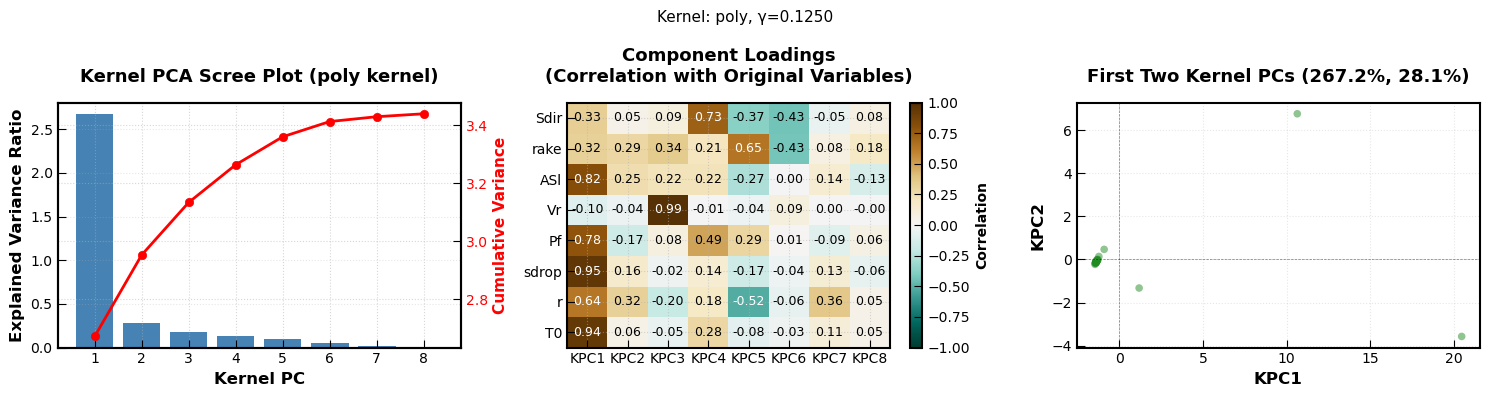

In [708]:
importlib.reload(StatsModel.cov_corr_funcs)
from StatsModel.cov_corr_funcs import plot_kernel_pca_analysis

# kernel pca
fig, axes, kpca, X_kpca = plot_kernel_pca_analysis(
    data_dict, 
    variables=variable_list,
    kernel='poly',  # or 'poly', 'sigmoid', etc.
    gamma=None  # auto-calculated if None
)

# Visual comparison
# fig, results = plot_kernel_comparison(data_dict,
#                                       variables=variable_list,
#                                       n_samples=50)


plt.savefig('covfigures/'+'kpcg-'+ 'slab-mean' + '.png')
plt.show()



### PCA for all models



In [ ]:
import StatsModel.combine_cov_data
importlib.reload(StatsModel.combine_cov_data)
from StatsModel.combine_cov_data import combine_csv_files, list_appendices_from_folder

# Define your folder and columns
folder_path = "/Users/DuoL/Documents/NSHM/Central/cov/slab3v/"
columns_list = ['fault-tag','Td0', 'ASl', 'Vr', 'rake','Ts0','Pn0','Sls','Sld','RT']

# Option 1: Just list the appendices first
appendices = list_appendices_from_folder(folder_path, prefix='stress_')
print(f"Found models: {appendices}")

# Option 2: Combine all files into one DataFrame
ssTable_all = combine_csv_files(
    folder_path=folder_path,
    columns_list=columns_list,
    prefix='stress_',
    add_source_column=True,  # Adds a 'model' column to track source
    source_column_name='model',
    stress_drop=True,
    group_by_fault=True,
    add_seg_tag=True,
    agg_func='mean',
    include_count=True,
)

print(ssTable_all.head())
print(f"Total rows: {len(ssTable_all)}")



In [588]:
print(ssTable_all.head())
print(f"Total rows: {len(ssTable_all)}")

ssTable_all = pd.read_csv('statsTable/stats-crust-mean.csv')


# ssTable_all['PSR']=np.sqrt(ssTable_all['SRs']**2+ ssTable_all['SRd']**2)
ssTable_all['r']=ssTable_all['T0']/np.abs(ssTable_all['Pf'])


ssTable_all['Sdir']= np.arcsin(ssTable_all['Td0']/ssTable_all['T0'])/np.pi*180.0
ssTable_all = ssTable_all.dropna(subset=['Sdir'])


print(ssTable_all.keys(),ssTable_all.__len__())

ssTable_all.to_csv('statsTable/'+'stats-crust-mean-sdir.csv')


   Unnamed: 0 fault-tag  count           Td0        ASl            Vr  \
0           0    jp3b_3   6439  4.933226e+06  24.011573  4.328743e+03   
1           1   jp3b_65  23673  2.719121e+06  14.200396  3.280655e+03   
2           2   jp3b_66   6191  1.399590e+06   3.079623  7.655731e+02   
3           3   jp3b_68  44750  1.041751e+07  39.608007  4.278291e+03   
4           4    jp3w_3  26905  1.992845e+05  14.518929  4.928601e+12   

        rake           Ts0           Pn0        Sls        Sld         RT  \
0  21.058254 -8.896054e+06 -1.090641e+08 -21.127531   8.849470   8.287651   
1  19.739933 -8.801527e+06 -9.952522e+07 -12.422732   4.784803  18.558924   
2  21.170365 -4.432953e+06 -7.473240e+07  -0.819196   0.633733  33.587199   
3  58.547145  6.377447e+06 -1.511222e+08  17.418129  32.766821  23.954678   
4  -1.613046  3.378846e+06 -6.802735e+07  14.053941   0.005069   5.913428   

   seg-tag         sdrop            T0            Pf         r       Sdir  
0      3.0  1.417577e+

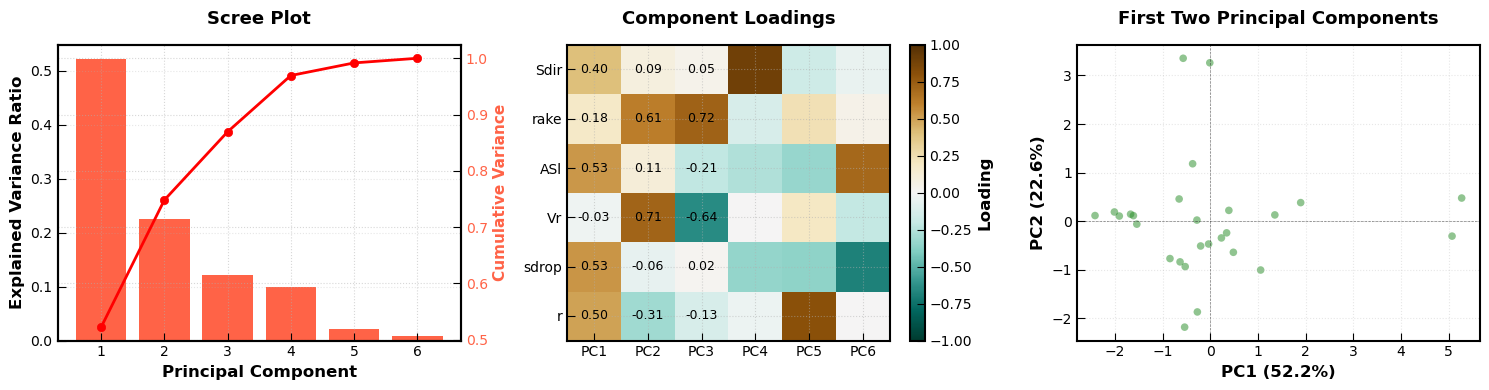

In [589]:
# linear PCA analysis
importlib.reload(StatsModel.cov_corr_funcs)
from StatsModel.cov_corr_funcs import plot_pca_analysis


ssTable_all=pd.read_csv('statsTable/stats-crust-mean-sdir.csv')

var_list = ['Sdir','rake','ASl','Vr','sdrop','r']
# Convert to dict with numpy arrays
data_dict = {col: ssTable_all[col].values for col in ssTable_all.columns}

fig, axes,pca = plot_pca_analysis(data_dict,variables=var_list)

plt.savefig('covfigures/'+'pca-crust-mean.png')


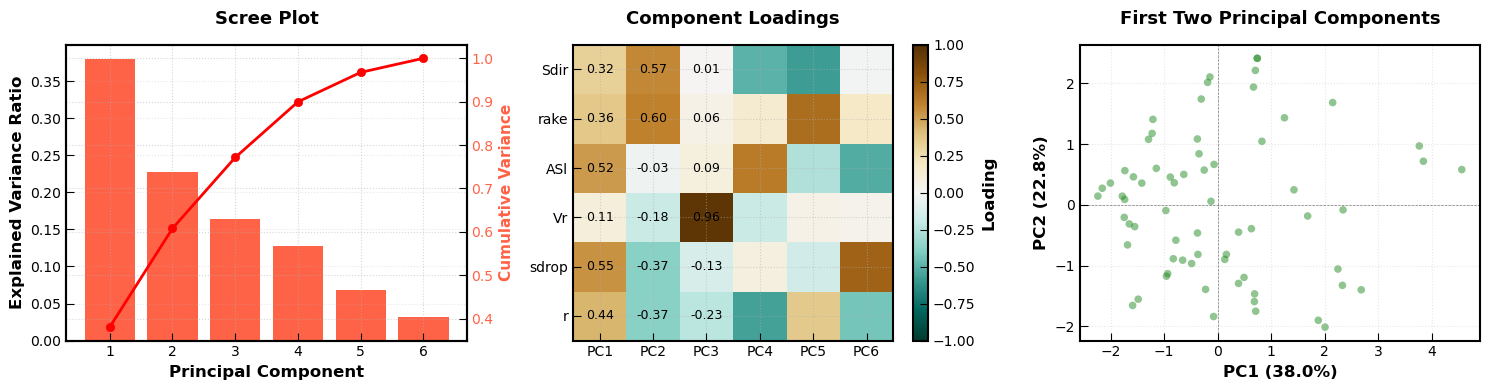

In [586]:
# linear PCA analysis
importlib.reload(StatsModel.cov_corr_funcs)
from StatsModel.cov_corr_funcs import plot_pca_analysis

# ssTable_all=pd.read_csv('statsTable/stats-slab3v-mean.csv')

var_list = ['Sdir','rake','ASl','Vr','sdrop','r']
# Convert to dict with numpy arrays
data_dict = {col: ssTable_all[col].values for col in ssTable_all.columns}

fig, axes,pca = plot_pca_analysis(data_dict,variables=var_list)

plt.savefig('covfigures/'+'pca-slab-mean.png')

In [ ]:
importlib.reload(StatsModel.cov_corr_funcs)
from StatsModel.cov_corr_funcs import plot_correlation_network

df = cov_to_corr(cov_aug)  # from your cov_to_corr
fig4, axes = plot_correlation_network(df, threshold=0.4)

In [ ]:
# extract time series of slip rate, traction and rupture speed

import importlib
import pandas as pd
import numpy as np

df_crust = pd.read_csv('jp3f_slab.csv')
# df_slab = pd.read_csv('jp4_interface.csv')

df_wai = df_crust[df_crust['fault-tag']==3]

df_wai_sorted = df_wai.sort_values(by='y_coord')

modelname = 'jp3f'

ele_crust = df_wai_sorted['ele']

# for time series data
ndt = 68

times = np.arange(0,ndt*0.5,0.5)

fault_sel = 3


import DyPltFunc.extract_slip_rates
importlib.reload(DyPltFunc.extract_slip_rates)
from DyPltFunc.extract_slip_rates import extract_sr_vr_t0_from_table

# find timeseries of slip rate, traction, rupture velocity. and rupture time
times, sr_data, t0_data,vr_data, rt_data  = extract_sr_vr_t0_from_table('/Users/DuoL/Documents/NSHM/PyScripts/gcTable/jp3f/jp3f-gc_',ele_crust,ndt=ndt)

print(sr_data.size)



3604


53


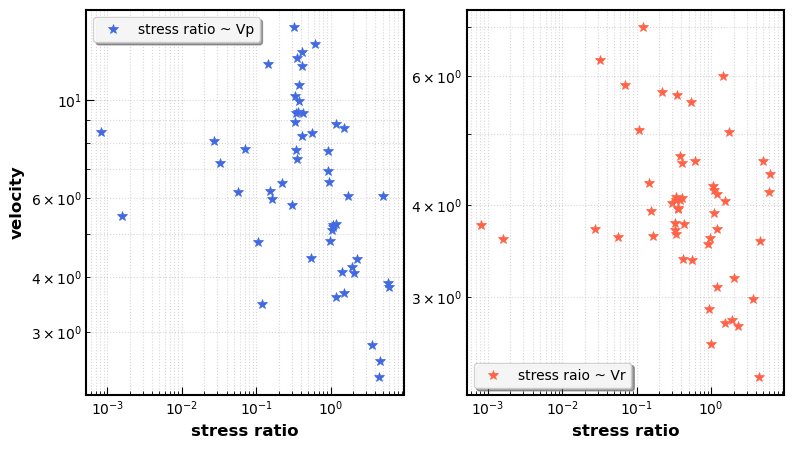

In [75]:
print(sr_data.shape[1])

# find the max. 
# t0_max = np.zeros([1,sr_data.shape[1]])
# delta_max = np.zeros([1,sr_data.shape[1]])

# vr_max = np.zeros([1,sr_data.shape[1]])
# sr_max = np.zeros([1,sr_data.shape[1]])

# r_max = np.zeros([1,sr_data.shape[1]])



# for iele in range(sr_data.shape[1]):
#     # t0_max[0,iele] = t0_data[:,iele].max()
#     # delta_max[0,iele] = t0_data[:,iele].max() - t0_data[-1,iele]
#     # sr_max[0,iele] = sr_data[:,iele].max()
#     # vr_max[0,iele] = vr_data[:,iele].max()

#     r_max[0,iele] = (t0_data[:,iele].max() - t0_data[0,iele])/(t0_data[0,iele] - t0_data[-1,iele])



plt.figure(figsize=(9,5))

ax1 = plt.subplot(1,2,1)
ax1.plot(r_max.flatten(), sr_max.flatten(),'*',c='royalblue',label='stress ratio ~ Vp')

ax2 = plt.subplot(1,2,2)
ax2.plot(r_max.flatten(), vr_max.flatten()/1e3,'*',c='tomato',label='stress raio ~ Vr')

ax2.set_xlabel('stress ratio')
ax1.set_xlabel('stress ratio')

ax1.set_ylabel('velocity')

ax1.set_yscale('log')
ax1.set_xscale('log')

ax2.set_yscale('log')
ax2.set_xscale('log')

ax1.legend()
ax2.legend()
plt.show()


53


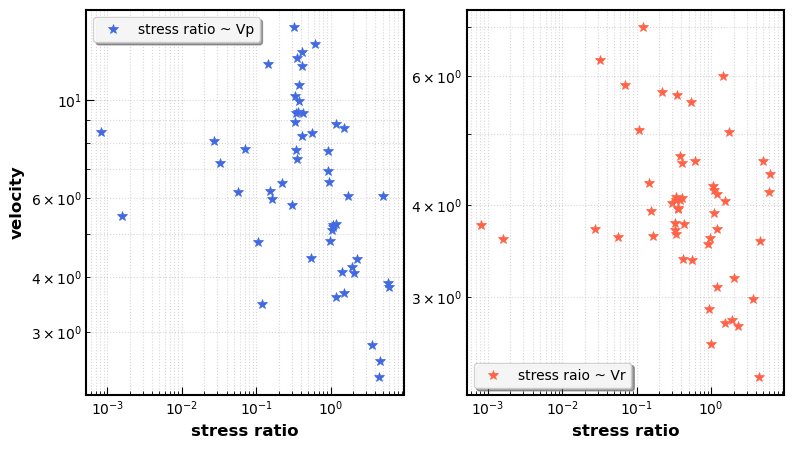

In [ ]:
print(sr_data.shape[1])

plt.figure(figsize=(9,5))

ax1 = plt.subplot(1,2,1)
ax1.plot(r_max.flatten(), sr_max.flatten(),'*',c='royalblue',label='stress ratio ~ Vp')

ax2 = plt.subplot(1,2,2)
ax2.plot(r_max.flatten(), vr_max.flatten()/1e3,'*',c='tomato',label='stress raio ~ Vr')

ax2.set_xlabel('stress ratio')
ax1.set_xlabel('stress ratio')

ax1.set_ylabel('velocity')

ax1.set_yscale('log')
ax1.set_xscale('log')

ax2.set_yscale('log')
ax2.set_xscale('log')

ax1.legend()
ax2.legend()
plt.show()


In [72]:

rmax, idmax = np.where(r_max > 0.01 )
print(idmax)

print(sr_max[0,idmax],t0_max[0,idmax],vr_max[0,idmax],r_max[0,idmax])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52]
[ 3.5954  4.8151  6.5198  4.3941  2.8138  4.2049  8.8138  6.0859  3.8677
  2.3745  3.7854  2.5881  7.7623  3.4672  7.2248  4.099   6.0616  4.7948
  4.0756  9.3436  8.0871  5.0823  5.2227  6.2005 12.044   5.2637 12.4
  6.232  14.532   5.9792 11.933   5.8107  8.9311  6.9041  3.6694  9.9073
  9.3149 10.197   5.1608 10.777   9.4019 12.813   7.7089  8.2728 13.342
  8.4329  8.6211  7.6822  7.3523  6.5064  4.4147] [35573000. 31747000. 32271000. 47103000. 51230000. 36959000. 30588000.
 65102000. 65792000. 60279000. 64795000. 65915000. 25152000. 28376000.
 28272000. 55066000. 62423000. 29666000. 62831000. 36329000. 29388000.
 51188000. 52085000. 30043000. 31968000. 54544000. 36460000. 31939000.
 35328000. 31321000. 34936000. 33252000. 34291000. 27599000. 56460000.
 33716000. 34691000. 36132000. 52788000. 37232000. 36601000. 37523000.
 36313

In [ ]:
# ssTable1.__len__()
# compare slip rate, rupture speed and dynamic stress drop

import importlib
import pandas as pd

df_crust = pd.read_csv('jp3f_slab.csv')
# df_slab = pd.read_csv('jp4_interface.csv')

df_wai = df_crust[df_crust['fault-tag']==3]

df_wai_sorted = df_wai.sort_values(by='y_coord')

modelname = 'jp3f'

ele_crust = df_wai_sorted['ele']

# xdmfFilename='/Users/DuoL/Documents/NSHM/Central/Joint4/data-jp4bH/jp4bH-fault.xdmf'
xdmfFilename = '/Users/DuoL/Documents/NSHM/Central/Joint3/jp3f/jp3f-fault.xdmf'


import DyPltFunc.extract_slip_rates
importlib.reload(DyPltFunc.extract_slip_rates)
from DyPltFunc.extract_slip_rates import extract_slip_rates_at_points

time_steps, SRs_arr, SRd_arr = extract_slip_rates_at_points(xdmfFilename, ele_crust)


Number of time steps: 69
Number of points to extract: 53
Time range: 0.000 to 34.000 seconds
Extraction complete!
Times shape: (69,)
SRs data shape: (69, 53)
SRd data shape: (69, 53)


Figure saved to covfigures/comparison.png


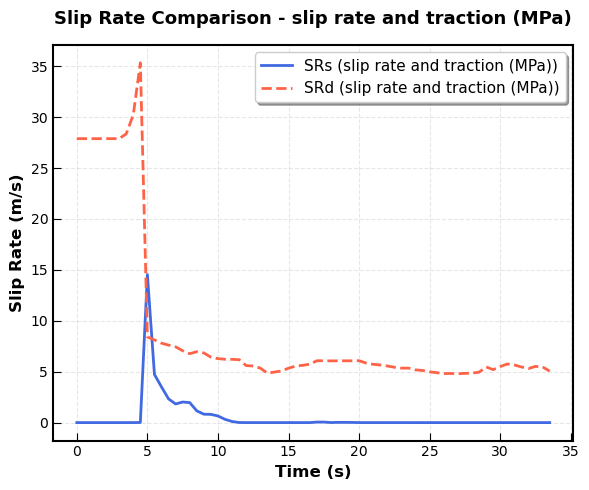

In [61]:
importlib.reload(DyPltFunc.extract_slip_rates)
from DyPltFunc.extract_slip_rates import plot_slip_rate_comparison

# Compare SRs and SRd at hypocenter
fig, ax = plot_slip_rate_comparison(times, sr_data,t0_data/1e6, 
                                     point_idx=30, 
                                     label='slip rate and traction (MPa)',
                                     save_path='covfigures/'+'comparison.png')

plt.show()


jp3f
Limiting to first 50 of 53 elements
Figure saved to covfigures/overlay-jp3f-crust.png


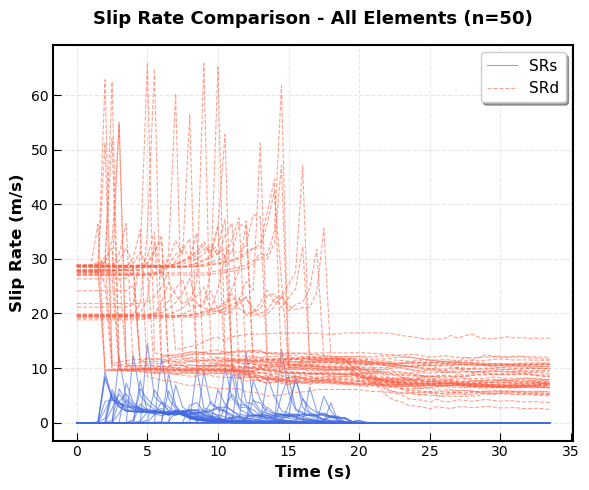

In [57]:
importlib.reload(DyPltFunc.extract_slip_rates)

from DyPltFunc.extract_slip_rates import plot_slip_rate_comparison_overlay

# Overlay both slip rates on one plot
print(modelname )

fig, ax = plot_slip_rate_comparison_overlay(times, sr_data, t0_data/1e6,
                                            max_elements=50,
                                            alpha=0.6,
                                            save_path='covfigures/'+ 'overlay-'+modelname+'-crust.png')

### Curvature 

In [ ]:

# ============================================================================
# Example usage
# ============================================================================
import seissolxdmf

import StatsModel.fault_curvature
importlib.reload(StatsModel.fault_curvature)

from StatsModel.fault_curvature import compute_mesh_curvatures,discrete_mean_curvature
from StatsModel.mesh_func4 import get_curvature_arrays

# Example: Simple mesh (4 vertices forming 2 triangles - a bent plane)

# xdmfFilename = '/Users/DuoL/Documents/NSHM/Central/crustal/welF400tap-fault.xdmf'
# sx = seissolxdmf.seissolxdmf(xdmfFilename)
    
# ndt = sx.ReadNdt()
# vertices = sx.ReadGeometry()
# faces = sx.ReadConnect()

# print(vertices.shape,faces.shape)

faces1= faces[::100,:]

# print("Computing curvatures for example mesh...")
# print(f"Vertices shape: {vertices.shape}")
# print(f"Faces1 shape: {faces1.shape}")


# # # Compute all curvatures
# curvature = compute_mesh_curvatures(vertices, faces1)


# Convert to arrays
H_array, K_array, valid_array = get_curvature_arrays(curvature, len(vertices))
print(f"\nCurvature arrays:")
print(f"H: {H_array}")
print(f"K: {K_array}")
print(f"Valid: {valid_array}")

# kappa_1, kappa_2, dir_1, dir_2 = compute_principal_curvatures(
#         vertices, faces1, "none"
#     )

# # Gaussian curvature
# K = kappa_1 * kappa_2

# # Mean curvature
# H = (kappa_1 + kappa_2) / 2.0


# print("\nResults:")
# print(f"Gaussian curvature (K): {curv['gaussian']}")
# print(f"Mean curvature (H): {curv['mean']}")
# print(f"Shape index (SI): {curv['shape_index']}")
# print(f"Curvedness (C): {curv['curvedness']}")

# # Statistics
# print("\nStatistics:")
# for key in ["gaussian", "mean", "shape_index"]:
#     stats = curvature_statistics(curv[key], key)
#     print(f"{key}: mean={stats['mean']:.6f}, std={stats['std']:.6f}")



Curvature arrays:
H: [171.64452345 130.46679058 181.02008112 ...          nan          nan
          nan]
K: [ 0.  0.  0. ... nan nan nan]
Valid: [ True  True  True ... False False False]
nan nan nan


max and min: 8.282694482977909e-09 -2.9190846910713075e-15 -1.1043592643970543e-08
max and min: 7.52316384526264e-37 9.047111823821444e-40 0.0
max and min: 6.505213034913027e-19 -2.2926437551692886e-25 -8.673617379884035e-19


#### check source scaling relation

In [47]:

import importlib
import pandas as pd

from StatsModel.load_seissol_data import load_rake_data

rootfolder = '/Users/DuoL/Documents/NSHM/Central/'

# crustal dataset 1
# crustal_models = ['crustal/dataset/stress_jp3yA.csv','crustal/dataset/stress_jp3yB.csv','crustal/dataset/stress_jp3yC.csv',\
#           'crustal/dataset/stress_jp3yD.csv', 'crustal/dataset/stress_jp3yE.csv','crustal/dataset/stress_jp3yF.csv']

# # crustal_models = ['crustal/dataset/stress_jp4g.csv','crustal/dataset/stress_jp4bF.csv','crustal/dataset/stress_jp4bH.csv']
      
# mw_models = [8.83,8.48,8.32]
# cf_models= [50,50,50,50,50,50]

# # for Mw 8.48, 8.32, 7.0+
# tc_models = [25,35,45,15,45,25]

# crustal+ subduction 
# crustal_models = ['crustal/dataset/stress_jp3yA.csv','crustal/dataset/stress_welEa.csv',
#                   'crustal/dataset/stress_welD.csv','crustal/dataset/stress_welBb.csv',\
#     'crustal/dataset/stress_welC.csv','crustal/dataset/stress_welA.csv','crustal/dataset/stress_jp4d.csv', \
#       'crustal/dataset/stress_jp4e.csv','crustal/dataset/stress_jp4f.csv','crustal/dataset/stress_jp3w.csv',\
#         'crustal/dataset/stress_jp3x.csv','crustal/dataset/stress_jp3xSF2.csv','crustal/dataset/stress_jp3a.csv',\
#           'crustal/dataset/stress_jp3b.csv','crustal/dataset/stress_jp3d.csv','crustal/dataset/stress_jp3f.csv', \
#           'crustal/dataset/stress_jp3g.csv', 'crustal/dataset/stress_welEbasin.csv','crustal/dataset/stress_jp3k.csv']
      
crustal_models =['cov/stress_jp4e_v2.csv',
      'cov/stress_jp4d_v2.csv','cov/stress_jp4f_v2.csv','cov/stress_jp3y_v2.csv',\
        'cov/stress_jp3w_v2.csv','cov/stress_jp3xSF2_v2.csv','cov/stress_jp3b_v2.csv',\
           'cov/stress_jp3f_v2.csv','cov/stress_jp3z_v2.csv'  ]

mw_models = [8.83,7.07, 7.11,7.16,7.08,7.08,8.32, 8.48,8.39,8.32,8.72,8.68,8.4,8.9,8.7,7.9,7.9,7.24,7.6]

cf_models= [50,50,50,50,50,50,50,50,50,50,50,100,100,150,150,130,130,50,100]

# shmax = [40,40,40,40,40,50,50,50,50,50,60,70,80,90]

rk_max = []
rk_min = []
rk_avg = []
rk_50th = []
u_avg =[]

# ssTable1  = pd.read_csv(rootfolder + 'crustal/dataset/stress_jp3yA.csv')


for imd, model in enumerate(crustal_models):

    datafile = rootfolder + model 

    try:

        if imd==0:

            rk_max1, rk_min1,rk_avg1, rk_50th1, u_avg1,ssTable1 = load_rake_data(datafile)

            ssTable1['conf']=np.full(ssTable1.__len__(),cf_models[imd])

        else:
            rk_max1, rk_min1,rk_avg1, rk_50th1, u_avg1,ssTable2 = load_rake_data(datafile)
            
            ssTable2['conf']=np.full(ssTable2.__len__(),cf_models[imd])


            ssTable1 = pd.concat([ssTable1,ssTable2],axis=0)
    except:

        print('no rake:',datafile)
        pass


print(ssTable1['conf'].unique())



[50]


In [103]:
# ssTable1.to_csv('stresstable_cc.csv')
importlib.reload(StatsModel.load_seissol_data)
from StatsModel.load_seissol_data import load_slip_data

rootfolder = '/Users/DuoL/Documents/NSHM/Central/'

# crustal dataset 1
# crustal_models = ['crustal/dataset/stress_jp3yA.csv','crustal/dataset/stress_jp3yB.csv','crustal/dataset/stress_jp3yC.csv',\
#           'crustal/dataset/stress_jp3yD.csv', 'crustal/dataset/stress_jp3yE.csv','crustal/dataset/stress_jp3yF.csv']

# # crustal_models = ['crustal/dataset/stress_jp4g.csv','crustal/dataset/stress_jp4bF.csv','crustal/dataset/stress_jp4bH.csv']
      
# mw_models = [8.83,8.48,8.32]
# cf_models= [50,50,50,50,50,50]

# # for Mw 8.48, 8.32, 7.0+
# tc_models = [25,35,45,15,45,25]

# crustal+ subduction 
crustal_models = ['crustal/dataset/stress_jp3yA.csv','crustal/dataset/stress_welEa.csv',
                  'crustal/dataset/stress_welD.csv','crustal/dataset/stress_welBb.csv',\
    'crustal/dataset/stress_welC.csv','crustal/dataset/stress_welA.csv','crustal/dataset/stress_jp4d.csv', \
      'crustal/dataset/stress_jp4e.csv','crustal/dataset/stress_jp4f.csv','crustal/dataset/stress_jp3w.csv',\
        'crustal/dataset/stress_jp3x.csv','crustal/dataset/stress_jp3xSF2.csv','crustal/dataset/stress_jp3a.csv',\
          'crustal/dataset/stress_jp3b.csv','crustal/dataset/stress_jp3d.csv','crustal/dataset/stress_jp3f.csv', \
          'crustal/dataset/stress_jp3g.csv', 'crustal/dataset/stress_welEbasin.csv','crustal/dataset/stress_jp3k.csv']
      

mw_models = [8.83,7.07, 7.11,7.16,7.08,7.08,8.32, 8.48,8.39,8.32,8.72,8.68,8.4,8.9,8.7,7.9,7.9,7.24,7.6]

cf_models= [50,50,50,50,50,50,50,50,50,50,50,100,100,150,150,130,130,50,100]

u_max = []
vr_avg = []
u_avg = []

# ssTable1  = pd.read_csv(rootfolder + 'crustal/dataset/stress_jp3yA.csv')


for imd, model in enumerate(crustal_models):

    datafile = rootfolder + model 

    rk_max1, rk_min1,rk_avg1 = load_slip_data(datafile)

    u_max.append(rk_max1)
    u_avg.append(rk_min1)
    vr_avg.append(rk_avg1)


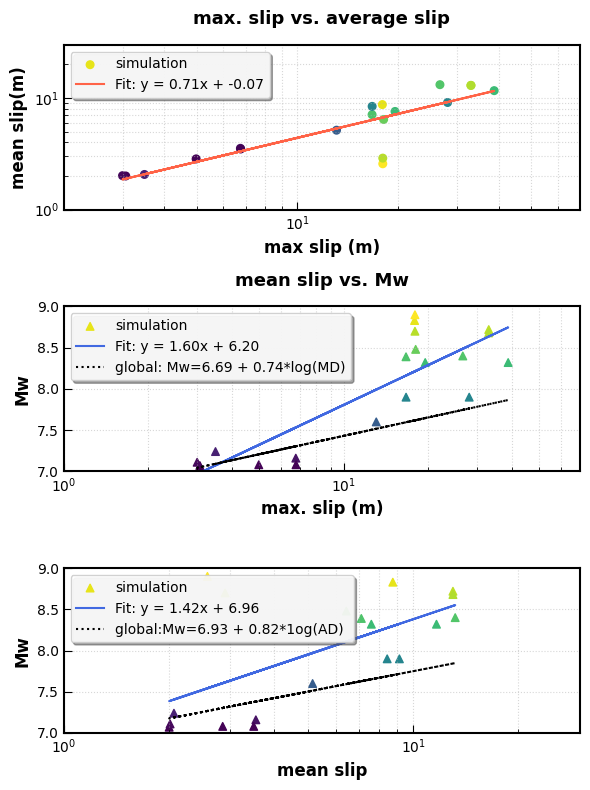

In [109]:
from scipy import stats

fig, ax1 = plt.subplots(3,1,figsize=(6,8))

ax1[0].scatter(u_max,u_avg,s=30,c=mw_models,marker='o',label='simulation')

ax1[1].scatter(u_max,mw_models,s=30,c=mw_models,marker='^',label='simulation')

im3 = ax1[2].scatter(u_avg,mw_models,s=30,c=mw_models,marker='^',label='simulation')

# Perform linear regression: y = mx + b
# coeffs = np.polyfit(np.log10(u_max),np.log10(u_avg), 1)  # 1 = linear (degree 1 polynomial)
# Perform regression
m,b, r_value, p_value, std_err = stats.linregress(np.log10(u_max),np.log10(u_avg))

ax1[0].set_xlabel('max slip (m)')
ax1[0].set_ylabel('mean slip(m)')
ax1[0].set_title('max. slip vs. average slip')
ax1[0].set_xscale('log')
ax1[0].set_yscale('log')

# Create fitted line
y_fit = m * np.log10(u_max) + b
ax1[0].plot(u_max, 10**y_fit, '-', color='tomato',linewidth=1.5, label=f'Fit: y = {m:.2f}x + {b:.2f}')

ax1[1].set_ylabel('Mw')
ax1[1].set_xlabel('max. slip (m)')
ax1[1].set_title('mean slip vs. Mw')
ax1[1].set_xscale('log')


# Perform linear regression: y = mx + b
# coeffs = np.polyfit(np.array(mw_models),np.log10(u_max),1)  # 1 = linear (degree 1 polynomial)
m,b, r_value, p_value, std_err = stats.linregress(np.log10(u_max),np.array(mw_models))


# Create fitted line
y_fit = m * np.log10(u_max) + b
ax1[1].plot((u_max),y_fit, '-', color='royalblue',linewidth=1.5, label=f'Fit: y = {m:.2f}x + {b:.2f}')

# global average
ax1[1].plot(u_max,6.69 + 0.74*np.log10(u_max),color='k',linestyle=':',linewidth = 1.5,label='global: Mw=6.69 + 0.74*log(MD)')


ax1[0].set_ylim([1,30])
ax1[0].set_xlim([2,70])
ax1[1].set_xlim([1,70])
ax1[1].set_ylim([7,9])

ax1[1].legend(loc=2)
ax1[0].legend(loc=2)


# Perform linear regression: y = mx + b
# coeffs = np.polyfit(np.array(mw_models),np.log10(u_avg),1)  # 1 = linear (degree 1 polynomial)
m,b, r_value, p_value, std_err = stats.linregress(np.log10(u_avg),np.array(mw_models))

# Create fitted line
y_fit = m * np.log10(u_avg) + b
ax1[2].plot((u_avg), y_fit, '-', color='royalblue',linewidth=1.5, label=f'Fit: y = {m:.2f}x + {b:.2f}')

# global average
ax1[2].plot((u_avg),6.93 + 0.82*np.log10(u_avg),color='k',linestyle=':',linewidth = 1.5,label='global:Mw=6.93 + 0.82*1og(AD) ')

ax1[2].set_xlim([1,30])
ax1[2].set_ylim([7,9])
ax1[2].set_xscale('log')
ax1[2].legend(loc=2)
ax1[2].set_xlabel('mean slip')
ax1[2].set_ylabel('Mw')


# Single colorbar on the right
# cbar = fig.colorbar(im3, ax=ax1, shrink=0.9, pad=0.02)
# cbar.set_label('Mw', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('slip_scaling.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
from StatsModel.simple_spectral_decay import simple_spectral_decay

# Basic usage - analyzes first numeric column
decay_exp, r2 = simple_spectral_decay('your_data.csv')

# Specify column and sampling rate
decay_exp, r2 = simple_spectral_decay('data.csv', 
                                     column_name='acceleration',
                                     sampling_rate=100)

# Fit specific frequency range
decay_exp, r2 = simple_spectral_decay('data.csv',
                                     sampling_rate=50,
                                     freq_range=(1, 25))  # 1-25 Hz



6.456542290346556

### Test codes

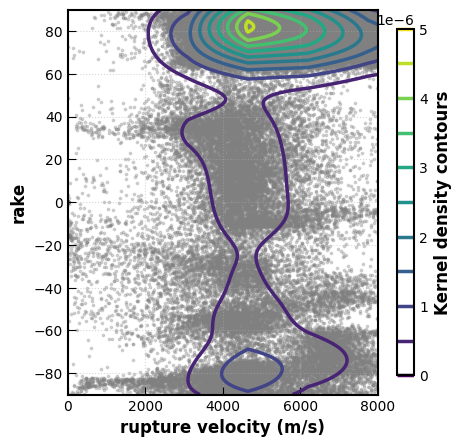

In [162]:
from scipy.stats import gaussian_kde
import numpy as np, matplotlib.pyplot as plt

# x = ssTable1["Vr"]
# y = ssTable1['rake']

# xy = np.vstack([x, y]); 
# kde = gaussian_kde(xy)
# xi, yi = np.mgrid[min(x):max(x):200j, min(y):max(y):200j]
# zi = kde(np.vstack([xi.ravel(), yi.ravel()])).reshape(xi.shape)

plt.figure(figsize=(5,5))

plt.scatter(x, y, s=3, alpha=0.3,color='gray')
axe=plt.contour(xi, yi, zi, levels=9,cmap='viridis'); 

clb = plt.colorbar(shrink=0.9)
clb.set_label('Kernel density contours')

plt.xlim([0,8000])
plt.xlabel('rupture velocity (m/s)')
plt.ylabel('rake')
plt.savefig('kde-'+modelname + '-vr-rake.png')
plt.show()


In [ ]:
import numpy as np

x = np.array([1.0, 2.0, 4.0, 5.0])
np.cov(x)                 # variance of x (unbiased, ddof=1)
print(x)

X = np.column_stack([x, np.array([2, 1, 0, 3])])

print(X
)

C = np.cov(X, rowvar=True)
print(C)

[1. 2. 4. 5.]
[[1. 2.]
 [2. 1.]
 [4. 0.]
 [5. 3.]]
[[ 0.5 -0.5 -2.  -1. ]
 [-0.5  0.5  2.   1. ]
 [-2.   2.   8.   4. ]
 [-1.   1.   4.   2. ]]


In [128]:
import numpy as np

# Example data with two variables
data = np.array([[1, 2, 3, 4, 5],
                 [5, 4, 3, 2, 1]])

# Calculate the covariance matrix
covariance_matrix = np.cov(data)
print(covariance_matrix)

[[ 2.5 -2.5]
 [-2.5  2.5]]
